In [275]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Polar Coordinate
- Decrease space between 2 training set.

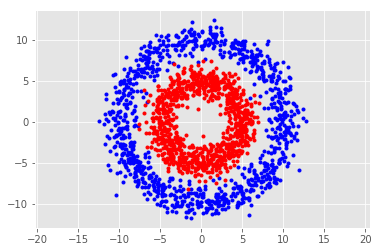

In [276]:
plt.style.use('ggplot')
import numpy as np
n=1000

#polar coordinate
r1=10+np.random.randn(n)
theta1=np.random.rand(n)*2.0*np.pi

r2=5+np.random.randn(n)
theta2=np.random.rand(n)*2.0*np.pi

x1=np.concatenate( (r1*np.cos(theta1), r2*np.cos(theta2)))
x2=np.concatenate( (r1*np.sin(theta1), r2*np.sin(theta2)))
yt=np.ones( (2*n,1))
yt[n:]=-1
plt.axis('equal')
plt.plot(x1[(yt==1)[:,0]],x2[(yt==1)[:,0]],'.b')
plt.plot(x1[(yt==-1)[:,0]],x2[(yt==-1)[:,0]],'.r')

In [277]:
x=np.concatenate( (x1.reshape((-1,1)), x2.reshape((-1,1))), axis=1 )
x.shape

(2000, 2)

In [278]:
def forward(a,w,b):
    z=np.dot(a,w)+b
    return np.tanh(z)

def g(a):
    return 1-a*a

def dense(wD, aD, daD, bD):
    wD=wD-alpha*np.dot(aD.T, daD)
    bD=bD-alpha*np.sum(daD,axis=0)
    return wD,bD

Loss: 0.9087831089220123
Loss: 0.14731608793218745
Loss: 0.1252005477229582
Loss: 0.17108261078620626
Loss: 0.13051337309936947
Loss: 0.1825565861038841
Loss: 0.1605760737611167
Loss: 0.2777888547166104
Loss: 0.1359286292918857
Loss: 0.12728939493287073


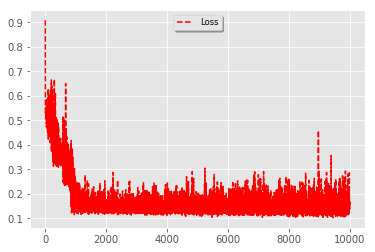

In [279]:
k0=2
k1=3
k2=1
w1=np.random.randn(k0,k1)
b1=np.random.randn(1,k1)
w2=np.random.randn(k1,k2)
b2=np.random.randn(1,k2)

k3=1
w3=np.random.randn(k2,k3)
b3=np.random.randn(1,k3)

m=10000
alpha=0.001

log = np.zeros((m,1))

for i in range(m):
    
    #forward
    a1=x
    a2=forward(a1,w1,b1)
    a3=forward(a2,w2,b2)
    a4=forward(a3,w3,b3)
    yp=a4
    L=0.5*np.average((yp-yt)*(yp-yt))
    
    #back propagation
    #New Layer
    da4= (yp-yt)*g(a4)
    
#     da3= (yp-yt)*g(a3)
    dz3= np.dot(da4,w3.T)
    da3= dz3*g(a3)
    
    dz2= np.dot(da3,w2.T)
    da2= dz2*g(a2)
    
    w1, b1= dense(w1, a1, da2, b1)
    
    w2, b2= dense(w2, a2, da3, b2)
    
    w3, b3= dense(w3, a3, da4, b3)
    
#     w1=w1-alpha*np.dot(a1.T, da2)
#     b1=b1-alpha*np.sum(da2,axis=0)
    
#     w2=w2-alpha*np.dot(a2.T, da3)
#     b2=b2-alpha*np.sum(da3,axis=0)
    
    log[i,:]=(L)
    
    if i%(m//10)==0:
        print("Loss: %s"%L)
        #print(" w1:%s, b1:%s, w2:%s, b2:%s "%(w1,b1,w2,b2) )

fig,ax = plt.subplots()
ax.plot(log[:,0],'r--',label='Loss')
legend = ax.legend(loc='upper center',shadow=True,fontsize="small")

In [280]:
def predict(x,y):
    u=[x,y]
    a1=u
    a2=forward(a1,w1,b1)
    a3=forward(a2,w2,b2)
    a4=forward(a3,w3,b3)
    yp=a4
    return yp

# Testing result
- Low k1 cannot solved this problem

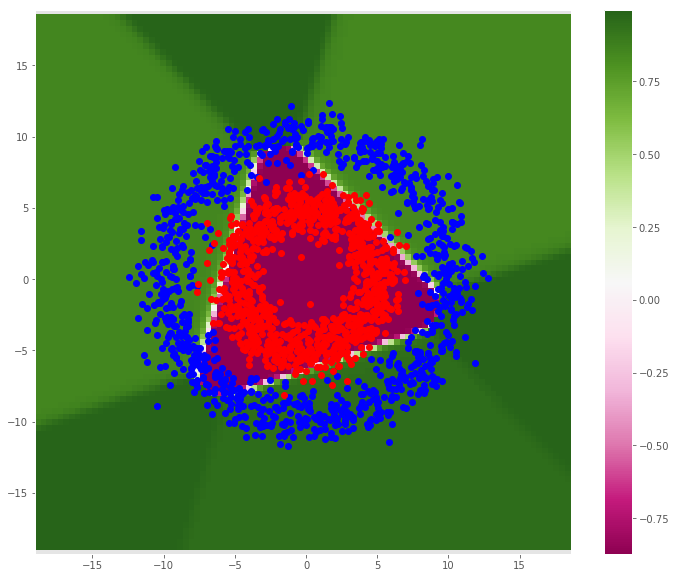

In [281]:
mx,my=np.mgrid[slice(-19,19,0.4),slice(-19,19,0.4)]
out=np.zeros(mx.shape)
for i in range(mx.shape[0]):
    for j in range(mx.shape[1]):
        out[i,j]= predict(mx[i,j],my[i,j])
#         u=[ mx[i,j], my[i,j]]
#         #forward
#         a1=u
#         a2=forward(a1,w1,b1)
#         a3=forward(a2,w2,b2)
#         yp=a3
#         out[i,j]=yp

plt.figure(figsize=(12,10))
plt.pcolor(mx,my,out,cmap=cm.PiYG)
plt.colorbar()
plt.axis('equal')
plt.plot(x1[(yt==1)[:,0]],x2[(yt==1)[:,0]],'ob')
plt.plot(x1[(yt==-1)[:,0]],x2[(yt==-1)[:,0]],'or')